In [3]:
# Understanding models - helps with selecting appropriate model, good set of hyperparameters, debugging, error analysis ...
# Linear Regression model - simple model
# Two ways to train it: closed-form equation - directly compyte the model parameters that best fit the training set (minimize cost function)
# 2) Interative optimization approach - Gradient Descent

In [4]:
# Linear model - makes a prediction by computing a weighted sum of the input features + a constant (called bias/intercept term)
# To train the model - need to have accuracy measure - e.g. RMSE:
# Need to find the value of all parameters that minimise RMSE
# in practive - simpler to minize MSE

In [5]:
# Normal Equation - methematical equation that gives a closed-form solutions which gives the result directly
# Generate some linear-looking data:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [6]:
# Lets find the parameters using the Normal Equation
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
# Equation from the book, p. 116
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.24170934]
 [2.79456741]]


In [7]:
# Can perform predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

print(y_predict)

[[4.24170934]
 [9.83084416]]


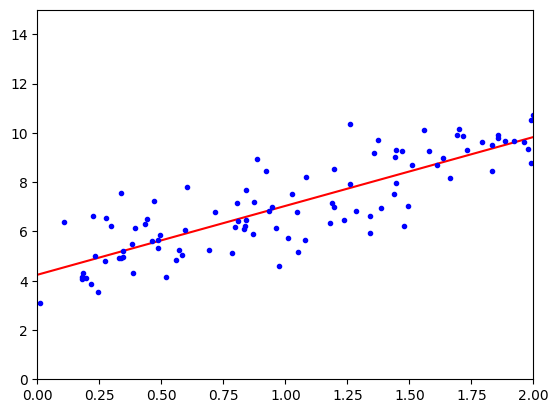

In [8]:
# Plotting model's predictions:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
# Let's do the same using Scikit-Learn:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.24170934]), array([[2.79456741]]))

In [10]:
# prediction:
lin_reg.predict(X_new)

array([[4.24170934],
       [9.83084416]])

In [11]:
# Lin.Reg. class is based on scipy.lingalg.lstsq() function - least squares
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.24170934],
       [2.79456741]])

In [12]:
# This function computes Normal Equation usnig the pseudoinverse of X - np.linalg.pinv()
# Using pseudoinverse - more efficient and handles edge cases nicely
np.linalg.pinv(X_b).dot(y)

array([[4.24170934],
       [2.79456741]])

In [13]:
# Comp. Complexity:
# inverse of X_trans*X - (n+1)x(n+1) mastrix (n - number of features)
# inverting such matrix - O(n^2.4)-O(n^3): If you double the number of features, you multiply the computation time by:
# 2^2.4=5.3-2^3=8
# The computations gets very slow when the number of features grows large. But is linear with regards to the number of instances of the training set
# Predictions are very fast - linear growth w.r.t. to features

# For a large number of features another approach might be better -> Gradient descent

In [14]:
# Gradient Descent - Generic optimization algorithm - Tweaks parameters iterativeley to minimize the cost function
# Measures the local gradient of the error function w.r.t. parameter vector Theta, and goes in the direction of descending gradient
# Start with random Theta values (random initialization) and then improve step by step until it converges to a minimum
# Step size - important parameter, determined by the learning rate hyperparam (too small - long convergence time, too big can miss the "valley")

# Challanges: 1) converging to a local minimum (worse than global minimum)
# 2) might take a very long time to cross a plateau - if you stop to early you wont find the global minimum

# Luckily MSE cost function of Lin.Reg - convex function - no local minima (Shape of a bowl)
# Also a continous function with a slope that never changes abruptly
# --> guarantees that G.D. to approach very close to the global minimum

# The scale of features can impact the speed of convergence - unsure that all features have a similar scale

In [16]:
# Batch G.D. - uses the whole batch of training data at every step - terribly slow on vert large data sets
# But scales well with number of features - much faster than Normal Equation or SVD decomposition (when many features)

# You find the features for the next step by: subtracting the "slope" from the last used set of features
# Learning rate can be added in front of the "slope" to determine the size of the "downhill step" (denoted by eta)
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    # Formula from the book - p. 124
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(theta)

[[4.24170934]
 [2.79456741]]


In [17]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

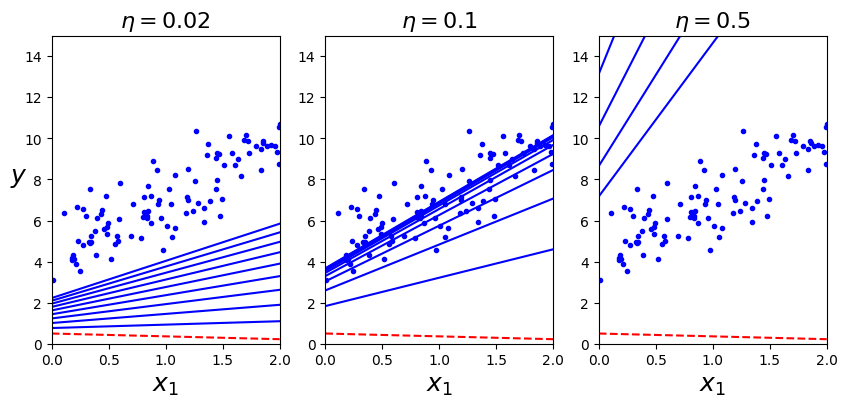

In [19]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

In [20]:
# Three learning rates - left and right show - "poorly" chosen learning rates (left - too slow, right - too large)
# Middle - converged to the minimun in very few learning steps

# Grid Search can be used to find the learning rate - may want to limit the number of iterations to eliminate models that take too long

# How to choose the number of iterations? Can set a very high number of iteration and interrupt the algorithm when the gradient vector becomes tiny
# I.e. when its norm becomes smaller than a tiny number - called tolerance (epsilon) - at that point G.D. (almost) reached the minimum

# Convergence rate  - can take O(1/epsilon) - so if you divide epsilon by ten, the algorithm may have to run about 10 times longer

In [21]:
# Stochastic G.D.
# pick a random instance in the training set at every step and computs gradients based only one that single instance
# Much faster (very little data to manipulate) --> possible to train on huge training sets

# Downside: much less regular than B.G.D. - const function will bounce up and down, decreasing only on average
# Over time will end up close to the minimum but never settle down - final parameters good, but not optimal

# Can help the algorithm jump out of local minima when the cost function is very irregular

# Potential way to avoid the problem - by gradually reducing the learning rate - large steps in the beginning which get smaller and smaller
# akin to simulated annealling - malten metal slowly being cooled down

# Learning schedule - function that determines the training rate at each iteration
# If the learning rate reduced to quickly - stuck in local minimum/halfway to the minimum
# If reduced to slowly - may jump around the minimum for a long time with a suboptimal solution if you halt training too early

Theta:  [[4.26121879]
 [2.76406942]]


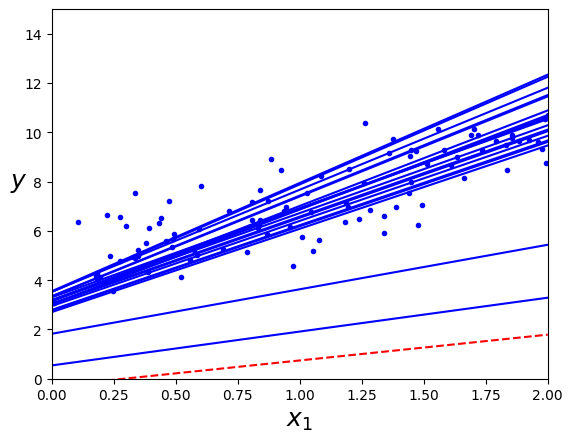

In [25]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style) 
            
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print("Theta: ", theta)

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown                                # not shown
plt.show()  

In [26]:
# iterate by rounds of m iterations (convention) - each round is called an epoch
# Going through the training set only 50 times and reaches an okay sollution

# Since instances picked randomly - some picked multiple times and some may have never been picked
# If you wan to ensure that the algorithm goes through every instance at each epoch - training set can be shuffled (input features and labels jointly)
# And then go through instance by instance, then shuffle again, etc.
# However, this method generally converges more slowly

# For S.G.D. - training instances need to be independent and identically distributed to ensure convergence toward a global minimum
# E.g. if you sort instances by label - SGD will start by optimizing for one label, and then the next, ... --> not settle close to a global min.

In [27]:
# Can do similar with Scikit-Learn - SGDRegressor vlass - defaults to optimizeing the squared error cost function
# example: max. 1000 epoch or until the loss drops by less than 1e-3 during one epoch
# learning rate: 0.1 (at start) with default learning schedule, without any regularization
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [28]:
# Solution again quite close as before:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24132467]), array([2.80271858]))